Example notebook to demonstrate how to make diagnostic plots using built in methods  

In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

%load_ext autoreload
%autoreload 2

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [2]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.0000107150_Momega00.010.h5",
                     "filepath_zero_ecc": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.0000000000_Momega00.002.h5",
                     "include_zero_ecc": True}
dataDict = load_waveform(catalog="EOB", **waveform_keywords)

### Diagnostic plots for Amplitude method

In [4]:
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDict, method="ResidualAmplitude", 
                                                                      return_ecc_method=True,
                                                                      extra_kwargs={"debug": False})

/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:355: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


(-1e-06, 1e-06)

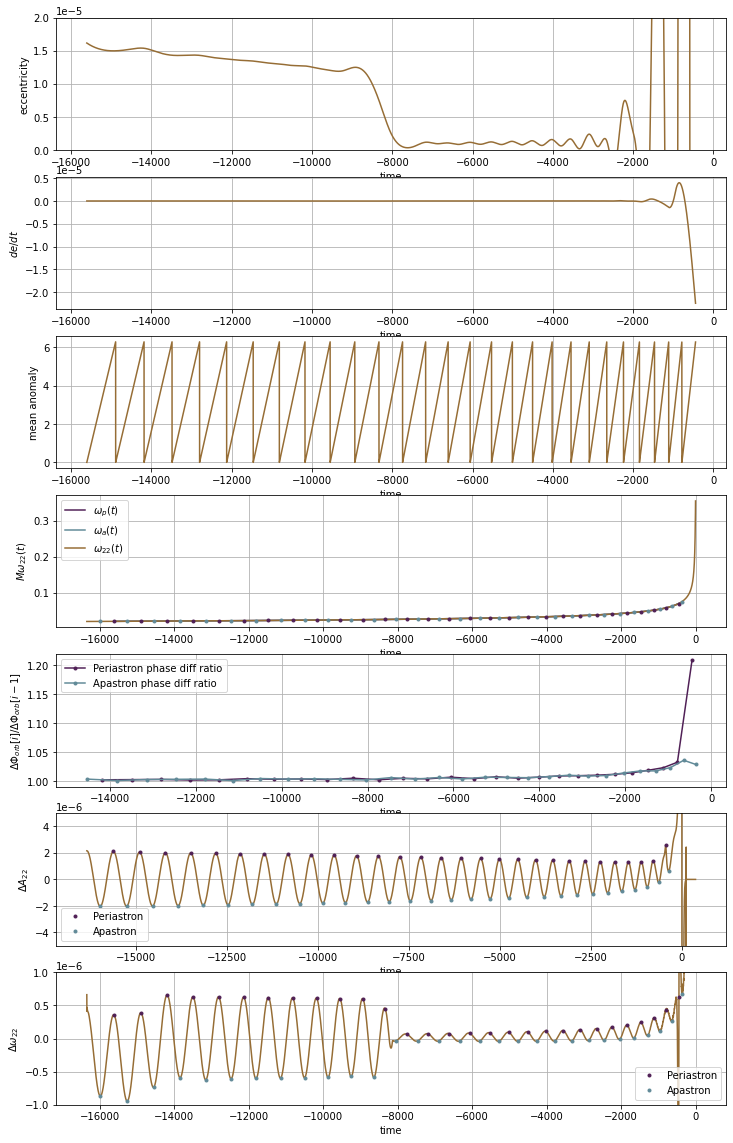

In [5]:
fig, ax = plt.subplots(nrows=7, figsize=(12, 20))
eccMethod.plot_measured_ecc(fig=fig, ax=ax[0])
eccMethod.plot_decc_dt(fig=fig, ax=ax[1])
eccMethod.plot_mean_ano(fig=fig, ax=ax[2])
eccMethod.plot_extrema_in_omega(fig=fig, ax=ax[3])
eccMethod.plot_phase_diff_ratio_between_peaks(fig=fig, ax=ax[4])
eccMethod.plot_residual_amp(fig=fig, ax=ax[5])
eccMethod.plot_residual_omega(fig=fig, ax=ax[6])

ax[5].set_ylim(-5e-6, 5e-6)
ax[0].set_ylim(0, 2e-5)
ax[6].set_ylim(-1e-6, 1e-6)

Or one can just use the in built make_diagnostic_plots to get all of these at once

(<Figure size 864x2016 with 7 Axes>,
 array([<AxesSubplot:xlabel='time', ylabel='eccentricity'>,
        <AxesSubplot:xlabel='time', ylabel='$de/dt$'>,
        <AxesSubplot:xlabel='time', ylabel='mean anomaly'>,
        <AxesSubplot:xlabel='time', ylabel='$M\\omega_{22}(t)$'>,
        <AxesSubplot:xlabel='time', ylabel='$\\Delta \\Phi_{orb}[i] / \\Delta \\Phi_{orb}[i-1]$'>,
        <AxesSubplot:xlabel='time', ylabel='$\\Delta\\omega_{22}$'>,
        <AxesSubplot:xlabel='time', ylabel='$\\Delta A_{22}$'>],
       dtype=object))

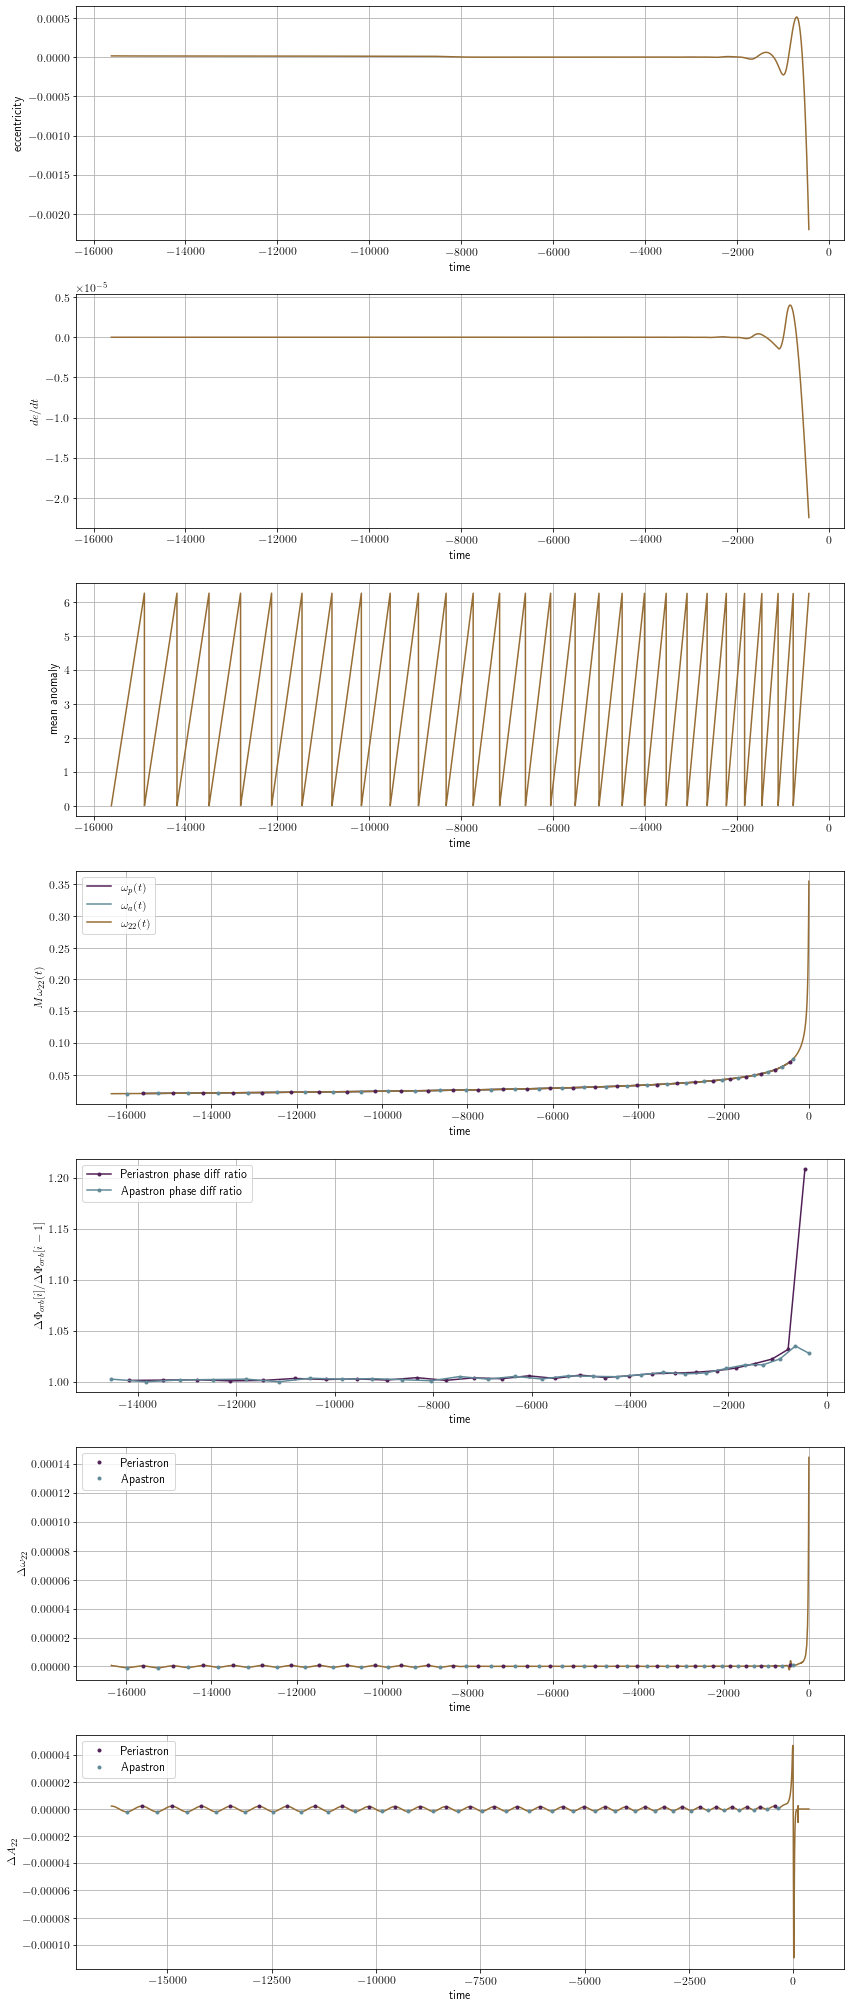

In [6]:
eccMethod.make_diagnostic_plots()